In [1]:
# Dependencies and setup
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Determine city from latitued and longitude
from citipy import citipy

# Get api key from config file, an untracked file in gitignore
from config import api_key

output_files = 'Output/cities.csv'

# Define range of latitudes and longitudes
lat_r=(-45, 45)
lng_r=(-180, 180)

##### Generate List of Cities

In [2]:
# Variable with an empty list to hold cities and lat_long
cities = []
lat_long = []

# Randomize creation of latitude & longitude. Set np size to 1000; change if needed
lat = np.random.uniform(low=-45.00, high=45.00, size=10)
lng = np.random.uniform(low=-180, high = 180, size=10)
lat_long = zip(lat, lng)

# Find nearest city with geo coordinates
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

# Validate sufficient number of cities generated        
len(cities)

10

##### API Calls

In [3]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Setup URL query
query_url = f'{base_url}appid={api_key}&units={units}&q='

# Dictionary of variables where data from api calls will be stored
city_data = {'City_Name':[], 'City_Lat':[], 'City_Long':[], 'Temperature':[], 'Humidity':[],
             'Cloudiness':[], 'Wind_Speed':[], 'Country':[], 'Date':[]}

In [4]:
city_ttls = len(cities)
r = 1

print('Retrieving weather data')
print('-' * 30)

for r, city in enumerate(cities):
    try:
        print(f'Retrieving {city}, number {r} of {city_ttls}.')
        r+=1
        city = requests.get(query_url + city).json()
        city_data["City_Name"].append(city["name"])
        city_data["City_Lat"].append(city["coord"]["lat"])
        city_data["City_Long"].append(city["coord"]["lon"])
        city_data["Temperature"].append(city["main"]["temp"])
        city_data["Humidity"].append(city["main"]["humidity"])
        city_data["Cloudiness"].append(city["clouds"]["all"])
        city_data["Wind_Speed"].append(city["wind"]["speed"])
        city_data["Country"].append(city["sys"]["country"])
        city_data["Date"].append(city["dt"])
        
        # Use timer to delay request to not exceed query limits.
        time.sleep(0.75)
    except:
        print(f'Incomplete record for {city}. Skipping {city}.')
        pass

print(f'Data retrieval completed.')

Retrieving weather data
------------------------------
Retrieving harper, number 0 of 10.
Retrieving airai, number 1 of 10.
Retrieving bairiki, number 2 of 10.
Retrieving rikitea, number 3 of 10.
Retrieving sur, number 4 of 10.
Incomplete record for sur. Skipping sur.
Retrieving cabo san lucas, number 5 of 10.
Retrieving cidreira, number 6 of 10.
Retrieving young, number 7 of 10.
Retrieving mataura, number 8 of 10.
Retrieving lorengau, number 9 of 10.
Data retrieval completed.


In [5]:
# Create New Dataframe From City Data
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv('Output/city_data.csv')
city_data_df.head()

,City_Name,City_Lat,City_Long,Temperature,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Harper,4.3750,-7.7169,78.91,86,100,7.29,LR,1622854124
1,Airai,-8.9266,125.4092,68.95,57,58,3.96,TL,1622854125
2,Bairiki Village,1.3292,172.9752,82.40,78,75,6.46,KI,1622854127
3,Rikitea,-23.1203,-134.9692,74.52,77,43,12.30,PF,1622854128
4,Cabo San Lucas,22.8909,-109.9124,87.33,27,1,13.80,MX,1622853556


##### Plotting City Data

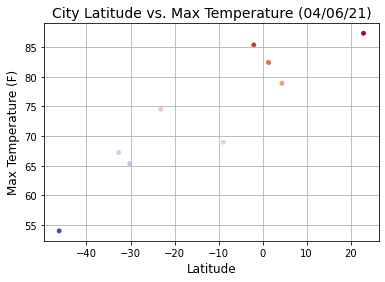

In [7]:
# Plot relationship of Temperature (F) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Temperature'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title('City Latitude vs. Max Temperature (04/06/21)', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.grid()

plt.savefig('Images/temperature-vs-latitude.png')
plt.show()